In [8]:
%matplotlib inline
import collections
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

data from https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#

How many most common words to print: 50

OK. The 50 most common words are as follows

the :  843
1 :  505
0 :  500
a :  430
and :  426
of :  375
is :  340
this :  287
i :  266
it :  251
to :  250
in :  203
was :  185
movie :  176
that :  154
film :  152
for :  105
as :  94
but :  91
with :  90
on :  75
you :  75
one :  75
are :  75
not :  73
bad :  67
very :  64
it's :  63
just :  63
all :  60
so :  59
good :  56
at :  53
an :  53
there :  51
about :  50
be :  50
have :  48
by :  48
like :  47
from :  46
if :  43
time :  42
acting :  41
his :  41
really :  41
great :  40
out :  39
even :  39
or :  38


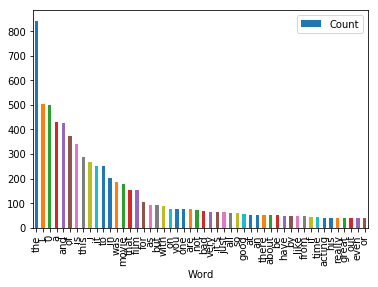

In [14]:
#load messages from yelp
# Read input file, note the encoding is specified here 
# It may be different in your text file
file = open('imdb_labelled.txt')
a= file.read()
# Stopwords
#stopwords = set(line.strip() for line in open('stopwords.txt'))
#stopwords = stopwords.union(set(['mr','mrs','one','two','said']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')
    

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [17]:
file = open('imdb_labelled.txt')
text = []
positivity = []

for line in file:
    text.append(line[:-2].strip())
    positivity.append(int(line[-2]))
    
df = pd.DataFrame()
df["text"] = text 
df["positivity"] = positivity
df.head()

,text,positivity
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [18]:
keywords = ['like', 'good', 'bad', 'great', ]

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

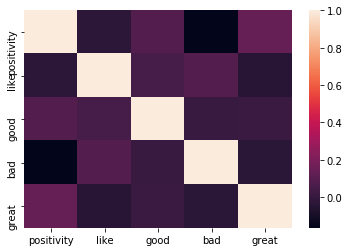

In [19]:
sns.heatmap(df.corr())

In [21]:
data = df[keywords]
target = df['positivity']

In [22]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 456
